    Table of Contents
    1. Problem Statement
    2. Project Objective
    3. Data Description
    4. Data Pre-processing Steps and Inspiration
    5. Choosing the Algorithm for the Project
    6. Motivation and Reasons For Choosing the Algorithm
    7. Assumptions
    8. Model Evaluation and Techniques
    9. Inferences from the Same
    10. Future Possibilities of the Project
    11. Conclusion
    12. References

# Problem Statement

A Walmart retail store has multiple outlets across the country. They are facing Inventory Management problem. 
These stores are unable to match the demand with respect to supply. The basic case is to know the demand of products that are sold in the store. If the decision making authority know whats the demand of each products for a week or month, they would be able to plan the supply chain accordingly. If that is possible this would save a lot of money for them because they don't have to overstock or can plan their Logistics accordingly.

# Project Objective

1. Using the above data, come up with useful insights that can be used by each of the stores to improve in various areas.
2. Forecast the sales for each store for the next 12 weeks. We want to analyze how internal and external (Temperatue , CPI, Unemployment Rate and Fuel Prices) factors are playing a role.

In [3]:
#import Libraries
import numpy as np # mathematical computation
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
from matplotlib import pyplot
import seaborn as sns # visualization
import warnings 
warnings.filterwarnings('ignore') #ignore warnings

#machine Learning models Libraries
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import RidgeCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression

#Preprocessing related Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

#Date related Libraries
from datetime import date
#import holidays
import datetime

# Data Description

In [4]:
data = pd.read_csv('Walmart.csv')

In [5]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [6]:
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


This file contains data related to the store, department, and regional activity for the given dates. It contains 6435 rows and 8 columns.

Below is brief insight to each feature:

Store : Store number

Date : Week of Sales

Weekly_Sales:  Sales for the given store in that week

Holiday_Flag : If it is a holiday week

Temperature : Temperature on the day of the sale

Fuel_Price : Cost of the fuel in the region

CPI Consumer : consumer Price Index

Unemployment : Unemployment Rate during that week in the region of the store.

# Data Preprocessing Steps And Inspiration

In [7]:
# identify null values
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
data.loc[data['Weekly_Sales']<=0] #outliers

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


No negative weekly sales. Hence, it can be consluded that data is free from outliers. 

In [9]:
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [10]:
data['Date']=pd.to_datetime(data['Date']) #change data type to Date

In [11]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [12]:
##extract date in year, month and week. it can be used to better analysis thru visualization
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.week
data['Day'] = data['Date'].dt.day

In [13]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,17,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,48,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,18,3
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,39,28
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,19,10
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,50,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,42,19


In [14]:
data.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,3.474318e-12,6.289676e-16,1.038488e-15,-1.070464e-15
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,-1.837754e-02,6.753523e-02,6.610484e-02,-1.487292e-02
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,-5.678257e-02,3.322341e-01,3.288032e-01,-3.603594e-02
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,6.426923e-02,6.643970e-02,7.318701e-02,8.901925e-02
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,7.794703e-01,-5.283174e-02,-4.193804e-02,3.253169e-02
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,7.479573e-02,1.478843e-03,2.782979e-03,3.965821e-03
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-2.418135e-01,-2.061552e-03,-6.038021e-03,-8.166853e-03
Year,3.474318e-12,-0.018378,-5.678257e-02,0.064269,0.779470,0.074796,-0.241813,1.000000e+00,-1.390145e-01,-1.269874e-01,-1.277942e-02
Month,6.289676e-16,0.067535,3.322341e-01,0.066440,-0.052832,0.001479,-0.002062,-1.390145e-01,1.000000e+00,9.964777e-01,5.959249e-03
Week,1.038488e-15,0.066105,3.288032e-01,0.073187,-0.041938,0.002783,-0.006038,-1.269874e-01,9.964777e-01,1.000000e+00,8.748473e-02


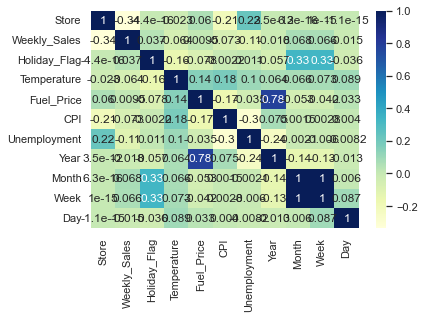

In [15]:
##Understanding co-relation visually thru heatmap

sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
#sns.set(rc = {'figure.figsize':(25,8)})

# displaying heatmap
plt.show()

From above there is strong positive correlation between year and Fuel Price. Lets anayse it better from below

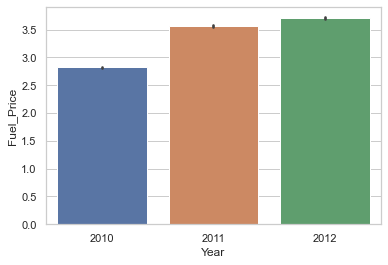

In [16]:
#Year vs Fuel_price

import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Year", y="Fuel_Price", data=data)
sns.set(rc = {'figure.figsize':(10,4)})

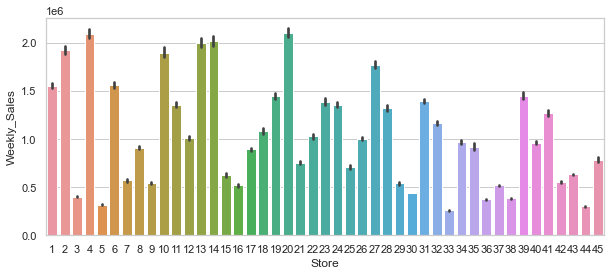

In [17]:
#Weekly sales vs Store

sns.set_theme(style="whitegrid")
ax = sns.barplot(x='Store', y="Weekly_Sales", data=data)


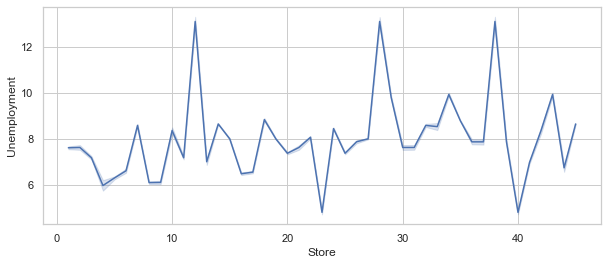

In [20]:
#Store Vs Unemployment
# draw lineplot
sns.lineplot(x="Store", y="Unemployment", data=data)
plt.show()

<AxesSubplot:xlabel='Month'>

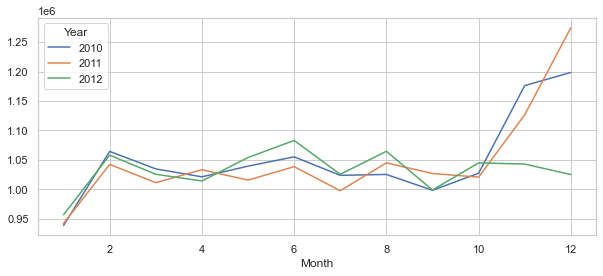

In [21]:
month_wise_sales = pd.pivot_table(data, values = "Weekly_Sales", columns = "Year", index = "Month")
month_wise_sales.plot()

Above shows sales are high after 10th month as it festive season

<AxesSubplot:xlabel='Month'>

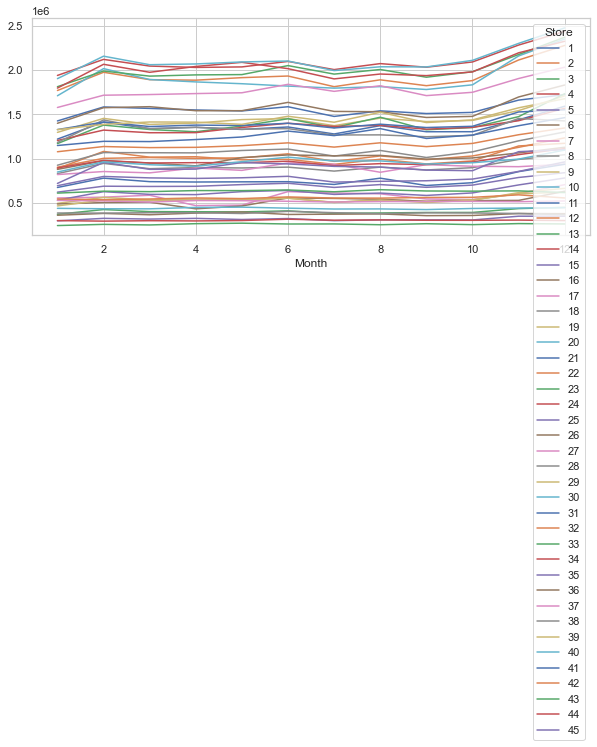

In [26]:
store_wise_sales = pd.pivot_table(data, values = "Weekly_Sales", columns = "Store", index = "Month")
store_wise_sales.plot()

<AxesSubplot:xlabel='Week'>

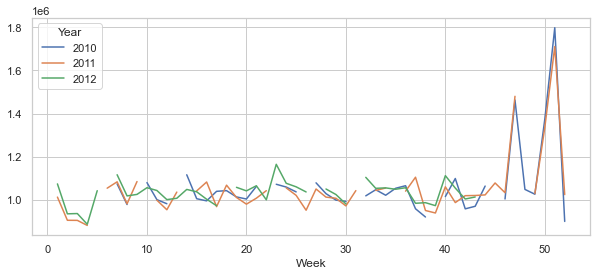

In [27]:
week_wise_sales = pd.pivot_table(data, values = "Weekly_Sales", columns = "Year", index = "Week")
week_wise_sales.plot()

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

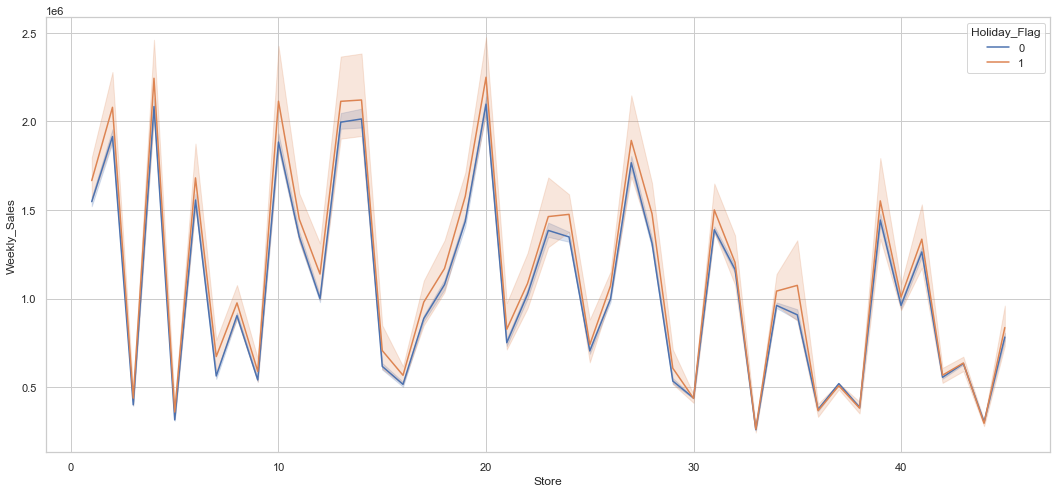

In [28]:
# weekly_sales Vs store on Holiday's 
plt.figure(figsize=(18,8))
sns.lineplot(x='Store', y='Weekly_Sales', hue='Holiday_Flag',data = data)

In the Distribution, natural Log of Sales and the square root of Sales look better distributed. We can use Natural Log for predictions later

In [29]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(data[column] , data['Weekly_Sales'], color = 'turquoise')
    plt.ylabel('Weekly Sales')
    plt.xlabel(column)

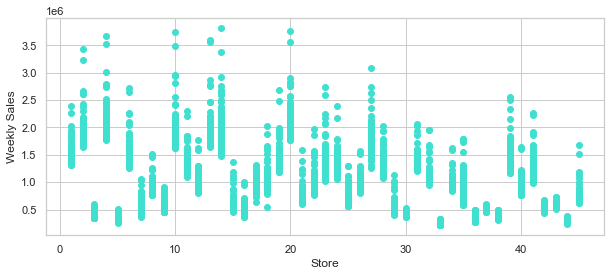

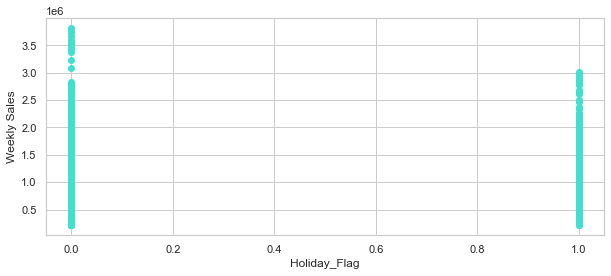

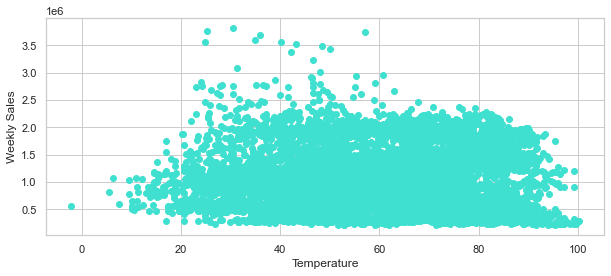

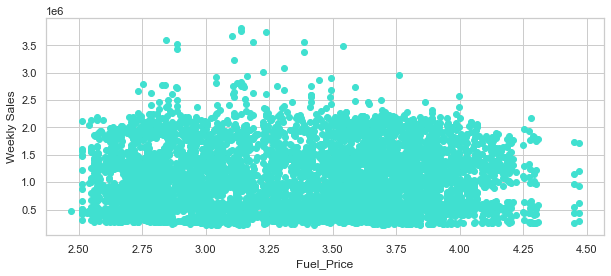

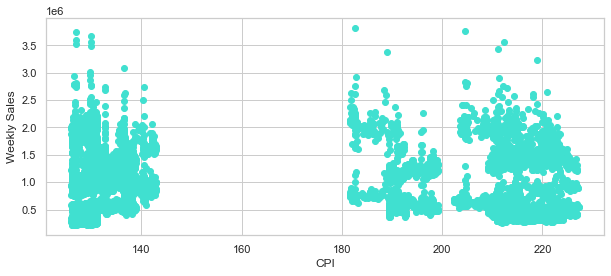

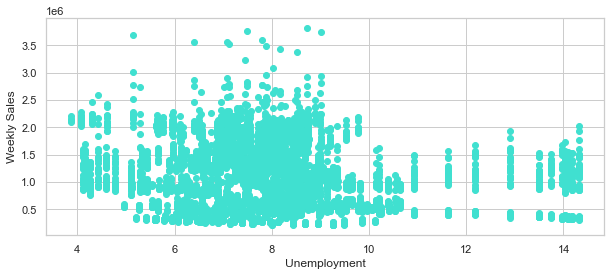

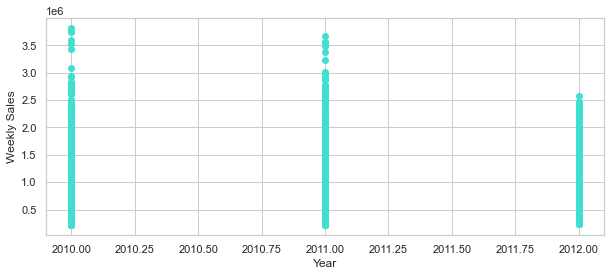

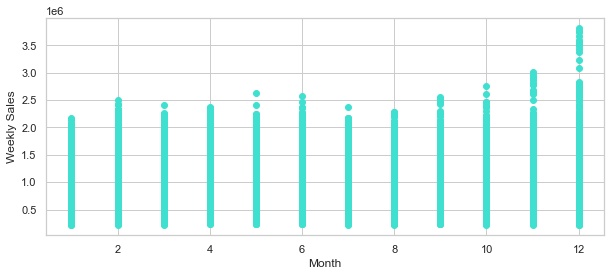

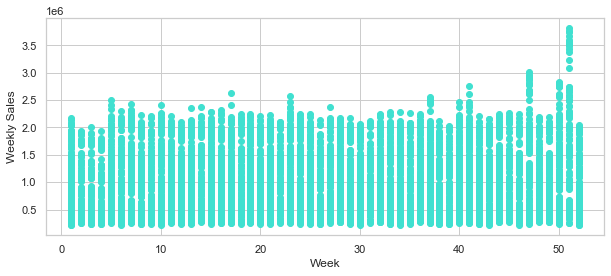

In [30]:
scatter(data, 'Store')
scatter(data, 'Holiday_Flag')
scatter(data, 'Temperature')
scatter(data, 'Fuel_Price')
scatter(data, 'CPI')
scatter(data, 'Unemployment')
scatter(data, 'Year')
scatter(data, 'Month')
scatter(data, 'Week')

# Choosing the Algorithm for the Project

  We will explore multiple algorithm and decide best among those. 

Data supplied to us is Timeseries Data. As there is only one variable dependent on time so we can conclude it as univariate time series. We will consider all stores as well as individual stores(couple of them in this example) and perform a detailed time-series analysis on it.

Additionally we will also explore regression models. 

# Motivation and Reasons For Choosing the Algorithm

In [31]:
traindf = data

In [32]:
traindf

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,17,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,48,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,18,3
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,39,28
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,19,10
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,50,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,42,19


In [33]:
traindf.set_index('Date', inplace=True)

In [34]:
traindf

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day
Date,,,,,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,17,2
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,48,2
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,19
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,26
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,18,3
...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,39,28
2012-05-10,45,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,19,10
2012-12-10,45,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,50,10


In [35]:
traindf1 = traindf.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [36]:
traindf1.set_index('Date',inplace = True)
traindf1

,Weekly_Sales
Date,
2010-01-10,42239875.87
2010-02-04,50423831.26
2010-02-07,48917484.50
2010-02-19,48276993.78
2010-02-26,43968571.13
...,...
2012-10-08,47403451.04
2012-10-19,45122410.57
2012-10-26,45544116.29


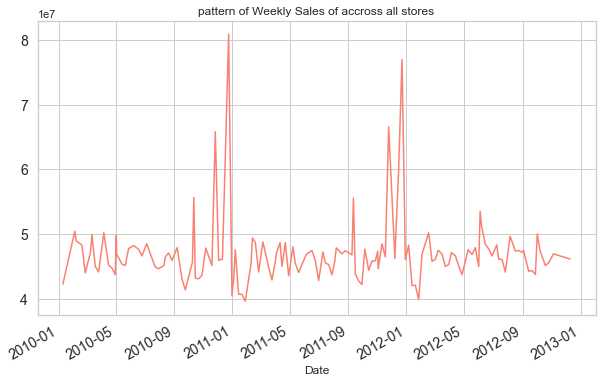

In [37]:
traindf1.Weekly_Sales.plot(figsize=(10,6), title= 'pattern of Weekly Sales of accross all stores', fontsize=14, color = 'salmon')
plt.show()

In [38]:
store4 = traindf[traindf.Store == 4]
# there are about 45 different stores in this dataset.

sales4 = pd.DataFrame(store4.Weekly_Sales.groupby(store4.index).sum())
sales4.dtypes
sales4.head(20)
# Grouped weekly sales by store 4

#remove date from index to change its dtype because it clearly isnt acceptable.
sales4.reset_index(inplace = True)

#converting 'date' column to a datetime type
sales4['Date'] = pd.to_datetime(sales4['Date'])
# resetting date back to the index
sales4.set_index('Date',inplace = True)

In [39]:
store6 = traindf[traindf.Store == 6]
# there are about 45 different stores in this dataset.

sales6 = pd.DataFrame(store6.Weekly_Sales.groupby(store6.index).sum())
sales6.dtypes
sales6.head(20)
# Grouped weekly sales by store6

#remove date from index to change its dtype because it clearly isnt acceptable.
sales6.reset_index(inplace = True)

#converting 'date' column to a datetime type
sales6['Date'] = pd.to_datetime(sales6['Date'])
# resetting date back to the index
sales6.set_index('Date',inplace = True)

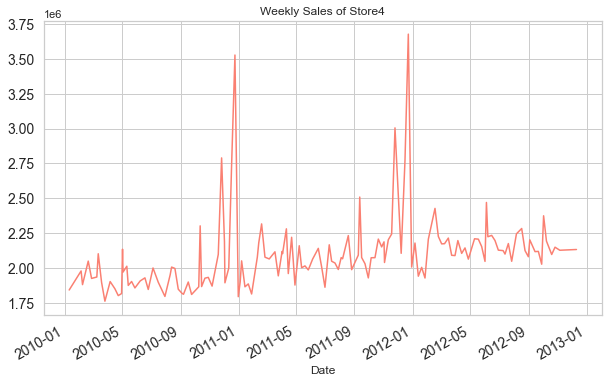

In [40]:
sales4.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of Store4', fontsize=14, color = 'salmon')
plt.show()

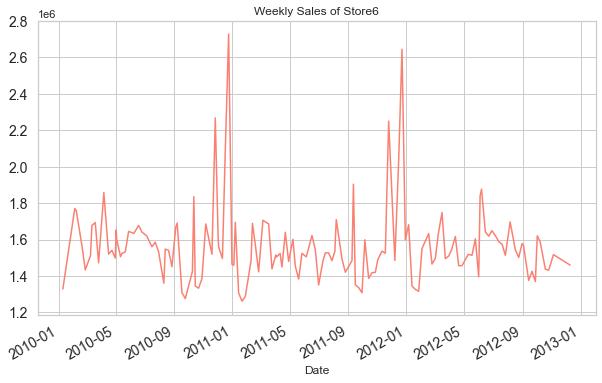

In [41]:
sales6.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of Store6', fontsize=14, color = 'salmon')
plt.show()

from above graphs, we can inference that sales spike up in festive season (chritsmas , new year etc). if you look at entire year, you can conslude it as seasonal. 

Seasonality : If observations repeats after fixed time interval then they are referred as seasonal observations. These seasonal changes in data can occur because of natural events or man-made events. 
  

Now lets look at decomposition. Decomposition helps to deconstruct the time series into several component like trend and seasonality for better visualization of its characteristics. Using time-series decomposition makes it easier to quickly identify a changing mean or variation in the data


<Figure size 720x288 with 0 Axes>

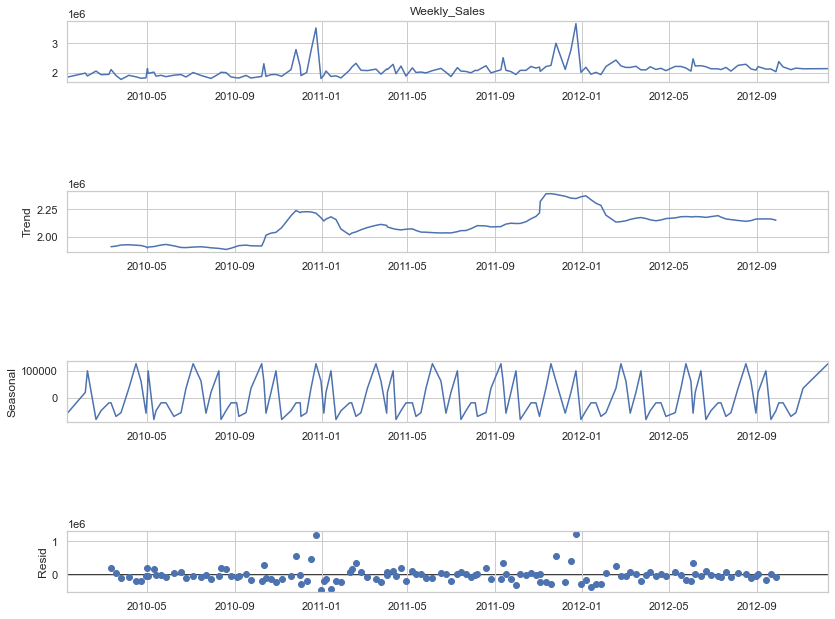

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales4.Weekly_Sales, period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

<Figure size 720x288 with 0 Axes>

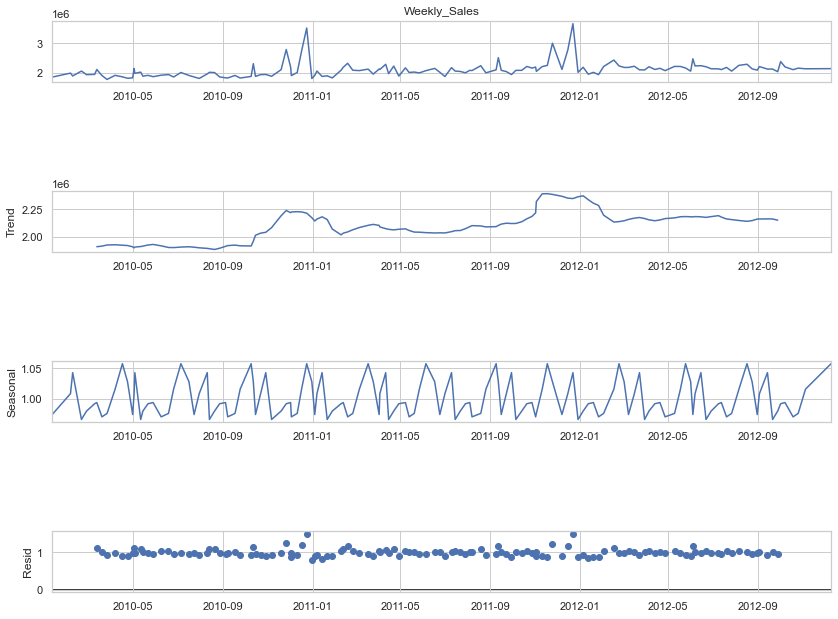

In [43]:
decomposition = seasonal_decompose(sales4.Weekly_Sales, model= 'multiplicative', period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

In [44]:
y1=sales4.Weekly_Sales
y2=sales6.Weekly_Sales

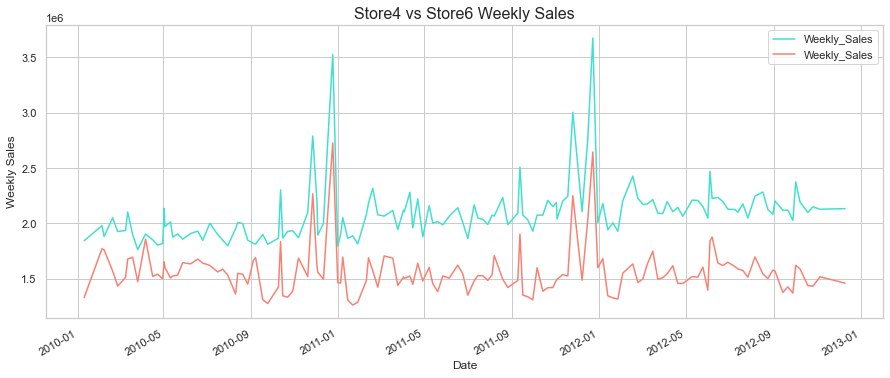

In [45]:
y1.plot(figsize=(15, 6), legend=True, color = 'turquoise')
y2.plot(figsize=(15, 6), legend=True, color = 'salmon')
plt.ylabel('Weekly Sales')
plt.title('Store4 vs Store6 Weekly Sales', fontsize = '16')
plt.show()

Both the stores have almost the same trends and spike just the magnitude is different.

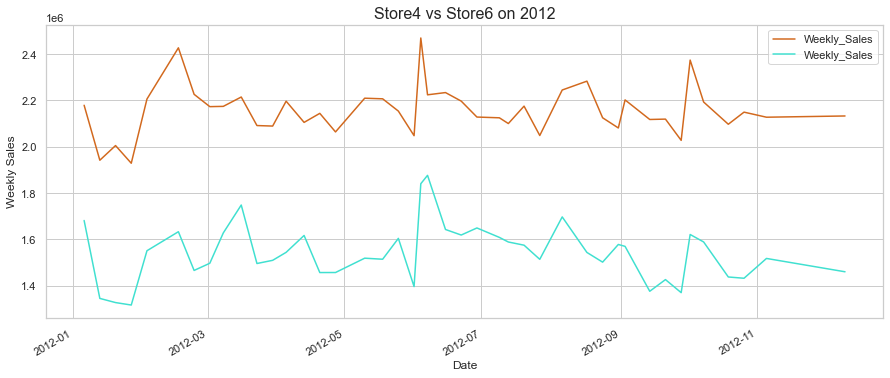

In [46]:
#Lets Look into 2012 data for a better view
y1['2012'].plot(figsize=(15, 6),legend=True, color = 'chocolate')
y2['2012'].plot(figsize=(15, 6), legend=True, color = 'turquoise')
plt.ylabel('Weekly Sales')
plt.title('Store4 vs Store6 on 2012', fontsize = '16')
plt.show()

From above we can conclude that it is not a trend.
Here comes yet another component of timeseries - Irregular component

From graphs , we can make out data is stationary as well as seasonal. However, lets rerun stationarity test and use autoarima to find the best values for p,d,q

In [47]:
### Testing For Stationarity for one store4

from statsmodels.tsa.stattools import adfuller

In [48]:
test_result=adfuller(sales4['Weekly_Sales'])

In [49]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Weekly_Sales):
    result=adfuller(Weekly_Sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [50]:
adfuller_test(sales4['Weekly_Sales'])

ADF Test Statistic : -8.586831982676426
p-value : 7.467948602506959e-14
#Lags Used : 0
Number of Observations Used : 142
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


Based on output of adfuller and  above visualizations, it can be concluded data is seasonal as well as staionary and hence, we will attempt to apply SARIMA.  

In [51]:
from pmdarima import auto_arima

In [52]:
import warnings
warnings.filterwarnings("ignore")
#Calling our model and generating best possible ARIMA combination,
#calling our function
stepwise_fit = auto_arima(sales4['Weekly_Sales'],suppress_warnings=True)           
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -1973.315
Date:                Tue, 16 Aug 2022   AIC                           3958.631
Time:                        22:39:33   BIC                           3976.366
Sample:                             0   HQIC                          3965.838
                                - 143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3835.8648   3224.196      1.190      0.234   -2483.443    1.02e+04
ar.L1         -0.5681      0.124     -4.599      0.000      -0.810      -0.326
ar.L2          0.2280      0.084      2.702      0.007       0.063       0.393
ma.L1         -0.0317      0.121     -0.263      0.793      -0.268       0.205
ma.L2         -0.8911      0.106     -8.446      0.000      -1.098      -0.684
sigma2      6.876e+10      0.001   6.27e+13      0.000    6.88e+10    6.88e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               264.88
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                             1.69
Prob(H) (two-sided):                  0.14   Kurtosis:                         8.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.42e+31. Standard errors may be unstable.
"""

Lets now look at visual of actual and predicted values for  SARIMAX(2, 1, 2)

<AxesSubplot:xlabel='Date'>

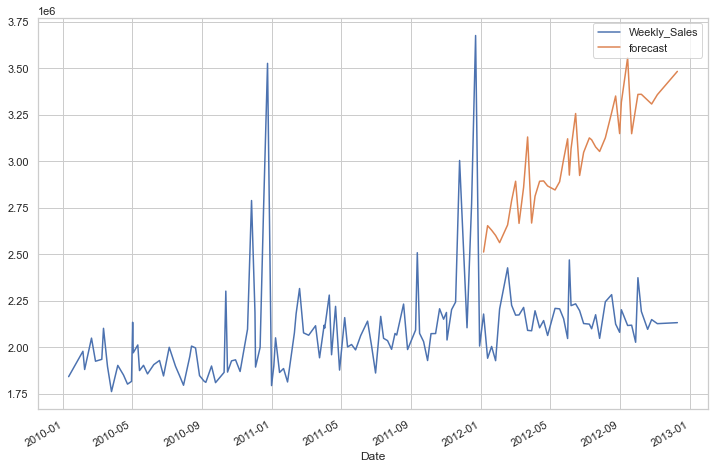

In [53]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(sales4['Weekly_Sales'],order=(2, 1, 2),seasonal_order=(2,1,2,12))
results=model.fit()
sales4['forecast']=results.predict(start=100,end=142,dynamic=True)
sales4[['Weekly_Sales','forecast']].plot(figsize=(12,8))

Forecast ans Actual one is not matching at all. Hence, it cannot be relied on. We will now evaluate Regression models 

In [54]:
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day
Date,,,,,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,17,2
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,48,2
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,19
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,26
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,18,3


In [55]:
data_heatmap_df=data.copy()

In [56]:
data_heatmap_df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Year', 'Month', 'Week', 'Day'],
      dtype='object')

In [57]:
data_heatmap_df.drop(['Store','Day','Month','Year'], axis=1,inplace=True)

In [58]:
## Correlation Heat map
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(12,8))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True, cmap='Pastel1_r')

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

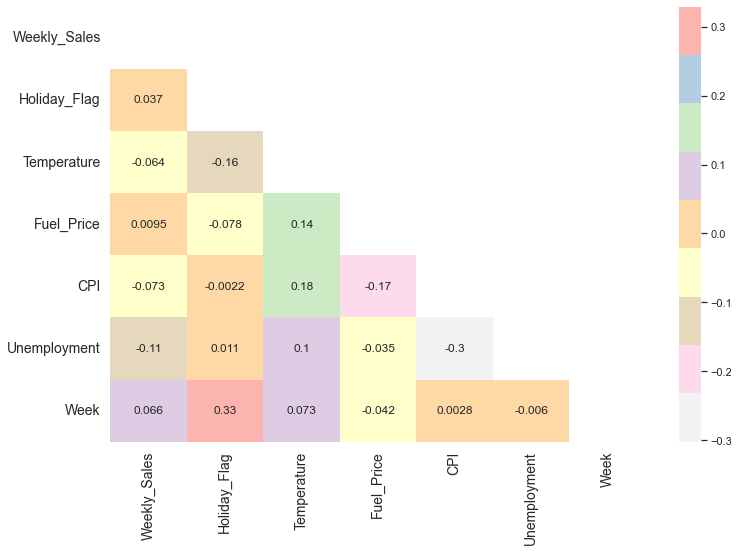

In [59]:
correlation_heat_map(data_heatmap_df)

 By checking the direct correlation of features there is no much promising correlations. There are no much correlation within the features as well. In a way this is good because there won't be multicollinearity that we have to take care while running models.

# Plotting data

In [60]:
data.index

DatetimeIndex(['2010-05-02', '2010-12-02', '2010-02-19', '2010-02-26',
               '2010-05-03', '2010-12-03', '2010-03-19', '2010-03-26',
               '2010-02-04', '2010-09-04',
               ...
               '2012-08-24', '2012-08-31', '2012-07-09', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-05-10', '2012-12-10',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=6435, freq=None)

In [61]:
temp_data=data.copy()

In [62]:
temp_data['Date']=data.index

In [63]:
temp_data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day,Date
Date,,,,,,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,17,2,2010-05-02
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,48,2,2010-12-02
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,19,2010-02-19
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,26,2010-02-26
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,18,3,2010-05-03


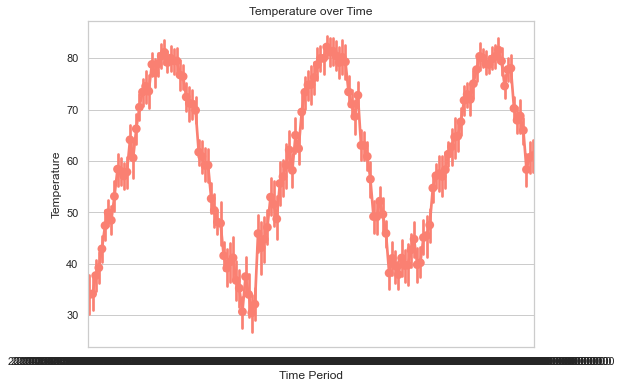

In [64]:
plt.figure(figsize=(8,6))
sns.pointplot(x="Date", y="Temperature", data=temp_data, color = 'salmon')
plt.xlabel('Time Period')
plt.ylabel('Temperature')
plt.title('Temperature over Time')
plt.show()

Graph clearly shows Temperature is more of a seasonal and repeated in cycles and this would be an interesting data point that we can use for studies further

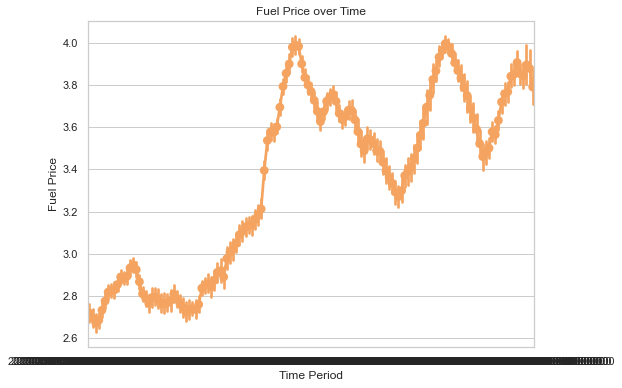

In [65]:
plt.figure(figsize=(8,6))
sns.pointplot(x="Date", y="Fuel_Price", data=temp_data, color = 'sandybrown')
plt.xlabel('Time Period')
plt.ylabel('Fuel Price')
plt.title('Fuel Price over Time')
plt.show()

Above show Fuel price varies over time and there are high and lows

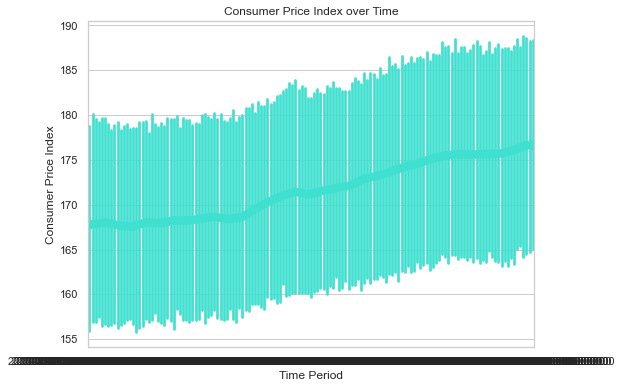

In [66]:
plt.figure(figsize=(8,6))
sns.pointplot(x="Date", y="CPI", data=temp_data, color = 'turquoise')
plt.xlabel('Time Period')
plt.ylabel('Consumer Price Index')
plt.title('Consumer Price Index over Time')
plt.show()

Above shows over time CPI have increased but the change is not much

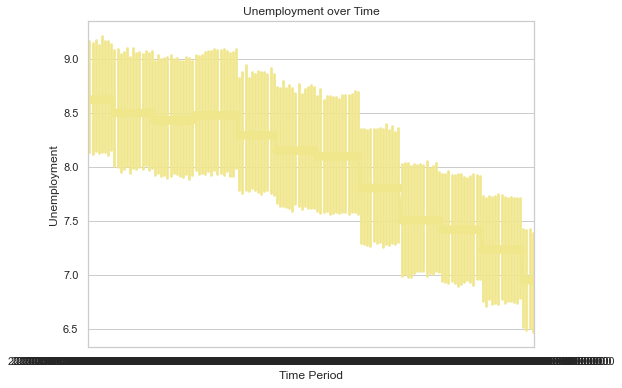

In [67]:
plt.figure(figsize=(8,6))
sns.pointplot(x="Date", y="Unemployment", data=temp_data, color='khaki')
plt.xlabel('Time Period')
plt.ylabel('Unemployment')
plt.title('Unemployment over Time')
plt.show()

Over time unemployment have came down we can see this factor also whether it have affected the Sales

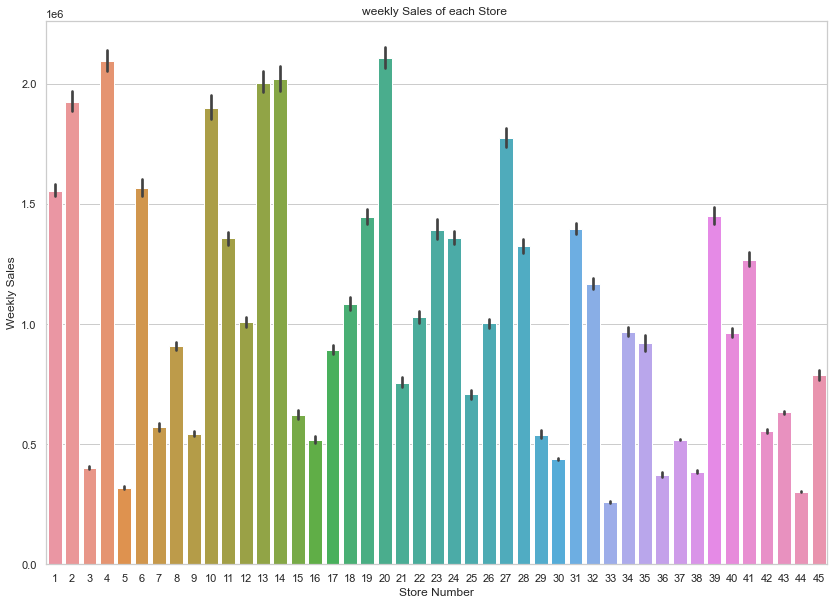

In [68]:
plt.subplots(figsize=(14,10))
sns.barplot(x="Store", y="Weekly_Sales", data=temp_data,orient='v')
plt.xlabel('Store Number')
plt.ylabel('Weekly Sales')
plt.title('weekly Sales of each Store ')
plt.show()

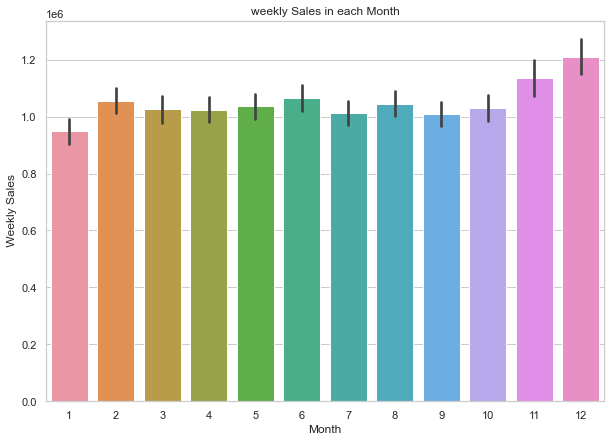

In [69]:
plt.subplots(figsize=(10,7))
sns.barplot(x="Month", y="Weekly_Sales", data=temp_data,orient='v')
plt.xlabel('Month')
plt.ylabel(' Weekly Sales')
plt.title('weekly Sales in each Month')
plt.show()

Jan has the least where as December has max sales.

Feature Engineering is must before we attempt for Regression Models

We will create dummies for "Store, Month, Year"

In [70]:
# Create Week column which says which week of the month it is. 
temp_data["Week"]= round(np.floor(((temp_data.Day-1)/7)+1))

# Create dummies for the columns that are required for later studies
Store_dummies = pd.get_dummies(temp_data.Store, prefix='Store')
Month_dummies = pd.get_dummies(temp_data.Month, prefix='Month')
Year_dummies = pd.get_dummies(temp_data.Year, prefix='Year')
Week_dummies = pd.get_dummies(temp_data.Week, prefix='Week')

# concatenate temp_dataFrames (axis=0 for rows, axis=1 for columns)
temp_data = pd.concat([temp_data, Store_dummies,Month_dummies,Year_dummies,Week_dummies], axis=1)

In [71]:
temp_data.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Year', 'Month', 'Week', 'Day', 'Date',
       'Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6',
       'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12',
       'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18',
       'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24',
       'Store_25', 'Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_30',
       'Store_31', 'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36',
       'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42',
       'Store_43', 'Store_44', 'Store_45', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12', 'Year_2010', 'Year_2011',
       'Year_2012', 'Week_1.0', 'Week_2.0', 'Week_3.0', 'Week_4.0',
       'Week_5.0'],
   

In [72]:
data_decision=temp_data.iloc[:,:12]

In [73]:
data_decision.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Year', 'Month', 'Week', 'Day', 'Date'],
      dtype='object')

In [74]:
data_decision["Week"]= round(np.floor(((data_decision.Day-1)/7)+1))

In [75]:
data_decision.head(100)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day,Date
Date,,,,,,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,1.0,2,2010-05-02
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,1.0,2,2010-12-02
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,3.0,19,2010-02-19
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,4.0,26,2010-02-26
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,1.0,3,2010-05-03
...,...,...,...,...,...,...,...,...,...,...,...,...
2011-02-12,1,1584083.95,0,48.91,3.172,218.714733,7.866,2011,2,2.0,12,2011-02-12
2011-09-12,1,1799682.38,0,43.93,3.158,218.961846,7.866,2011,9,2.0,12,2011-09-12
2011-12-16,1,1881176.67,0,51.63,3.159,219.179453,7.866,2011,12,3.0,16,2011-12-16


In [76]:
temp_data.drop(['Store','Month','Year','Day','Week'], axis=1, inplace=True) 

In [77]:
temp_data.columns

Index(['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Date', 'Store_1', 'Store_2', 'Store_3', 'Store_4',
       'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9', 'Store_10',
       'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16',
       'Store_17', 'Store_18', 'Store_19', 'Store_20', 'Store_21', 'Store_22',
       'Store_23', 'Store_24', 'Store_25', 'Store_26', 'Store_27', 'Store_28',
       'Store_29', 'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_34',
       'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_40',
       'Store_41', 'Store_42', 'Store_43', 'Store_44', 'Store_45', 'Month_1',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Year_2010',
       'Year_2011', 'Year_2012', 'Week_1.0', 'Week_2.0', 'Week_3.0',
       'Week_4.0', 'Week_5.0'],
      dtype='object')

In [78]:
data.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Year', 'Month', 'Week', 'Day'],
      dtype='object')

In [79]:
#Splitting the data in to train and test

In [80]:
newdata=data.copy()

In [81]:
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day
Date,,,,,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,17,2
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,48,2
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,19
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,26
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,18,3


In [82]:
newdata.drop(['Weekly_Sales'],axis=1, inplace=True)

In [83]:
X=newdata.iloc[:,:]
y=data.iloc[:,1]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [85]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [86]:
#applying KNN regressor

In [87]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [88]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10,n_jobs=4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

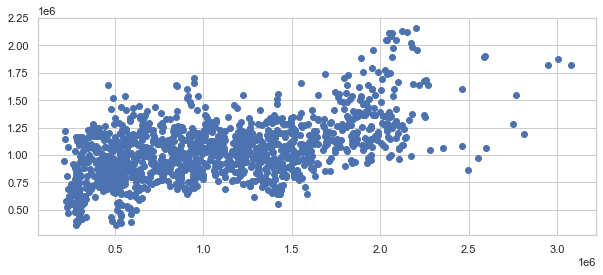

In [89]:
plt.scatter(y_test,y_pred)
plt.show()

In [90]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_absolute_error(y_test,y_pred)))
print(knn.score(X_test,y_test))


388772.19441724947
222685368370.8782
623.5159937140743
0.29751422358815593


Accuracy KNNRegressor: 29.75 %



In [107]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

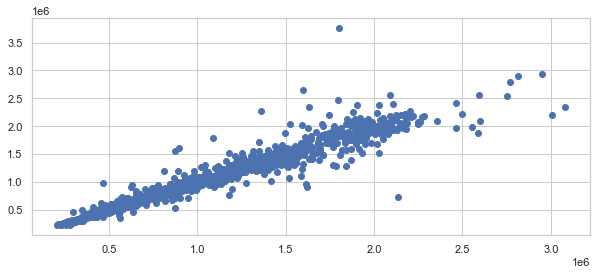

In [108]:
plt.scatter(y_test,y_pred)
plt.show()

In [109]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_absolute_error(y_test,y_pred)))
print(dt.score(X_test,y_test))

75100.40716394717
21226282800.538906
274.04453500105996
0.9330393287059628


Accuracy DecisionTreeRegressor: 93.30 %


In [110]:
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)

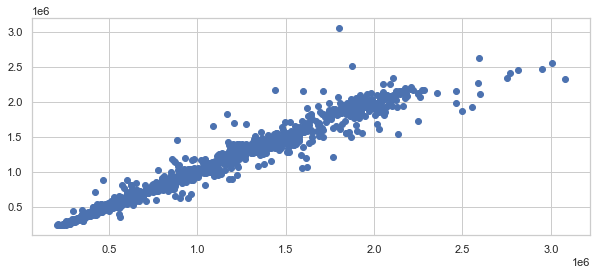

In [111]:
plt.scatter(y_test,y_pred)
plt.show()

In [112]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_absolute_error(y_test,y_pred)))
print(rfr.score(X_test,y_test))

62931.48314110952
13603601260.994293
250.86148197981595
0.9570859259243705


Accuracy RandomForestRegressor: 95.70

In [113]:
from xgboost import XGBRegressor
xgb_clf = XGBRegressor(objective='reg:squarederror', nthread= 4, n_estimators= 500, max_depth= 6, learning_rate= 0.5) 
xb = xgb_clf.fit(X_train,y_train)
y_pred=xgb_clf.predict(X_test)

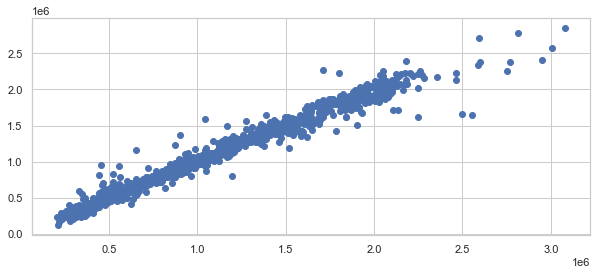

In [114]:
plt.scatter(y_test,y_pred)
plt.show()

In [115]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_absolute_error(y_test,y_pred)))
print(xb.score(X_test,y_test))

56405.69224189005
9048448722.109339
237.49882576949733
0.9714556615354841


Accuracy XGBRegressor: 97.14

In [116]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators=30,n_jobs=4) 
etr.fit(X_train,y_train)
y_pred=etr.predict(X_test)

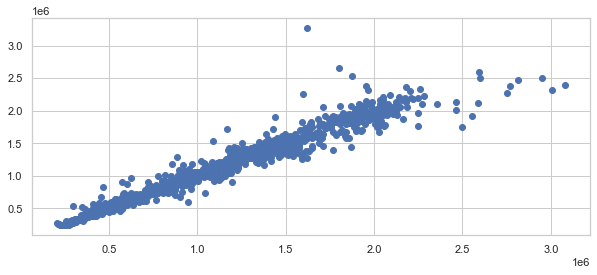

In [117]:
plt.scatter(y_test,y_pred)
plt.show()

In [118]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_absolute_error(y_test,y_pred)))
print(etr.score(X_test,y_test))

63604.691181300186
13754890431.025896
252.19970495878894
0.9566086674010563


Accuracy of ExtraTreesRegressor: 96.27

In [119]:
# training top n models
dt = DecisionTreeRegressor(random_state=0)
etr = ExtraTreesRegressor(n_estimators=30,n_jobs=4) 
xgb_clf = XGBRegressor(objective='reg:squarederror', nthread= 4, n_estimators= 500, max_depth= 6, learning_rate= 0.5) 
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=4)
dt.fit(X_train,y_train)
etr.fit(X_train,y_train)
xgb_clf.fit(X_train,y_train)
rfr.fit(X_train,y_train)
# predicting on test data
etr_pred=etr.predict(X_test)
xgb_clf_pred=xgb_clf.predict(X_test)
rfr_pred=rfr.predict(X_test)
dt_pred = dt.predict(X_test)

In [120]:
#calculate Aveg of RMSE SCORES

In [121]:
final = (etr_pred + xgb_clf_pred + rfr_pred + dt_pred)/4.0

In [122]:
print(mean_absolute_error(y_test,final))
print(mean_squared_error(y_test,final))
print(np.sqrt(mean_absolute_error(y_test,final)))

53830.415459178235
9562934722.187326
232.0138260086632


# Choosing the Algorithm for the Project

XGBRegressor

# Motivation and Reasons For Choosing the Algorithm

We concluded on this by taking averages of top n models. As here available data is less, so loss difference is not extraordinary . But in large datasets of sizes , this Method of simple averaging may reduce the loss to a great extent.


# Model Evaluation and Techniques

From above detail analysis , it can be seen that we evaluated Model on basis of

mean_absolute_error

mean_squared_error

root mean_squared_error

model score


# Saving the Model

In [123]:
from xgboost import XGBRegressor
xgb_clf = XGBRegressor(objective='reg:squarederror', nthread= 4, n_estimators= 500, max_depth= 6, learning_rate= 0.5) 
xb = xgb_clf.fit(X_train,y_train)

In [126]:
import pickle
# save the model to disk
filename = 'finalized__walmart_model.sav'
pickle.dump(xgb_clf, open(filename, 'wb'))

# Inferences 

Size of the store is the highest contributing predictor in the model out of all.

Each store has a unique prediction power. They can be separately analyzed to get prediction for each individual store

The Sales are very high during November and December and go down in January. So its better to employee more staff as casual employee in November and December and encourage permanent staff to take leaves during January.

The predicted sales data can be used to analyse the sales pattern and accordingly adjust the staff in the store.

When we implement the project to department level it helps to plan the inventory and staff from a centralised station to every store, which will further help in better planning and cost cutting for inventory management, supply chain management and human resource.

The low selling stores should look forward to increasing their size and capacity to store more items and consumer products.

Special discount coupons can be distributed during low selling periods to attract more customers

Sales are likely to fluctuate during holidays. Special offers can be given during festive season accompanied with suitable marketing to keep the sales high during holidays as well

# Future Possibilities of the Project

The Next steps would be :-

To check into the store that have poor prediction and check deep what makes those bad.

To further improve the predictive model using the ensembling method to combine models and come with better model.

Take the data to Department level and to predict the Department level sales which would help to solve the inventory management issues and supply chain management.

# Conclusion

Here we can see that our RMSE reduced in comparison to our best performing single model i.e. XGBRegressor with RMSE of 3804. Hence we can conclude that taking averages of top n models helps in reducing loss.

As here available data is less, so loss difference is not extraordinary . But in large datasets of sizes, this Method of simple averaging may reduce the loss to a great extent

# References

https://www.kaggle.com/code/anushkaml/walmart-time-series-sales-forecasting/notebook

https://www.youtube.com/watch?v=kdVMiW5b9Xo

# Forecasting Sales

In [142]:
sampledata=data.copy()

In [144]:
sampledata

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day
Date,,,,,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,17,2
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,48,2
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,19
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,26
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,18,3
...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,39,28
2012-05-10,45,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,19,10
2012-12-10,45,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,50,10


In [145]:
sampledata = sampledata[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price','CPI', 'Unemployment', 'Year','Month','Week','Day','Weekly_Sales']]

In [146]:
sampledata

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day,Weekly_Sales
Date,,,,,,,,,,,
2010-05-02,1,0,42.31,2.572,211.096358,8.106,2010,5,17,2,1643690.90
2010-12-02,1,1,38.51,2.548,211.242170,8.106,2010,12,48,2,1641957.44
2010-02-19,1,0,39.93,2.514,211.289143,8.106,2010,2,7,19,1611968.17
2010-02-26,1,0,46.63,2.561,211.319643,8.106,2010,2,8,26,1409727.59
2010-05-03,1,0,46.50,2.625,211.350143,8.106,2010,5,18,3,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,45,0,64.88,3.997,192.013558,8.684,2012,9,39,28,713173.95
2012-05-10,45,0,64.89,3.985,192.170412,8.667,2012,5,19,10,733455.07
2012-12-10,45,0,54.47,4.000,192.327265,8.667,2012,12,50,10,734464.36


In [149]:
X=sampledata.iloc[:,:-1]

In [150]:
X

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day
Date,,,,,,,,,,
2010-05-02,1,0,42.31,2.572,211.096358,8.106,2010,5,17,2
2010-12-02,1,1,38.51,2.548,211.242170,8.106,2010,12,48,2
2010-02-19,1,0,39.93,2.514,211.289143,8.106,2010,2,7,19
2010-02-26,1,0,46.63,2.561,211.319643,8.106,2010,2,8,26
2010-05-03,1,0,46.50,2.625,211.350143,8.106,2010,5,18,3
...,...,...,...,...,...,...,...,...,...,...
2012-09-28,45,0,64.88,3.997,192.013558,8.684,2012,9,39,28
2012-05-10,45,0,64.89,3.985,192.170412,8.667,2012,5,19,10
2012-12-10,45,0,54.47,4.000,192.327265,8.667,2012,12,50,10


In [169]:
# Load the pickled model

with open('finalized__walmart_model.sav' , 'rb') as f:
    xgb_clf_from_pickle = pickle.load(f)

In [170]:
y_predicted=xgb_clf_from_pickle.predict(X)

In [171]:
y_predicted

array([ 737237. ,  737237. ,  737237. , ..., 1133644.6, 1133644.6,
       1133644.6], dtype=float32)

In [172]:
testfile['Predicted_weekly _sales']

0        737237.000
1        737237.000
2        737237.000
3        737237.000
4        737237.000
           ...     
6430    1133644.625
6431    1133644.625
6432    1133644.625
6433    1133644.625
6434    1133644.625
Name: Predicted_weekly _sales, Length: 6435, dtype: float32